In [75]:
import pandas as pd

file_path = r"C:\Users\Carlos\Documents\BootCamp\Data Analyst\Week5\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file_path)

In [77]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [79]:
category_freq = df["category"].value_counts()
print(category_freq)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [7]:
category_freq5 = df["category"].value_counts().head(5)
print(category_freq5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


C:\Users\Carlos\AppData\Local\Temp\ipykernel_123952\539660817.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_freq5.index,


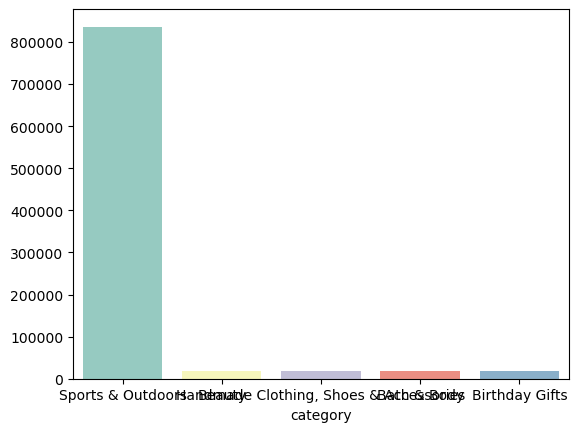

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=category_freq5.index,
            y=category_freq5.values,
            palette = "Set3")
plt.show()

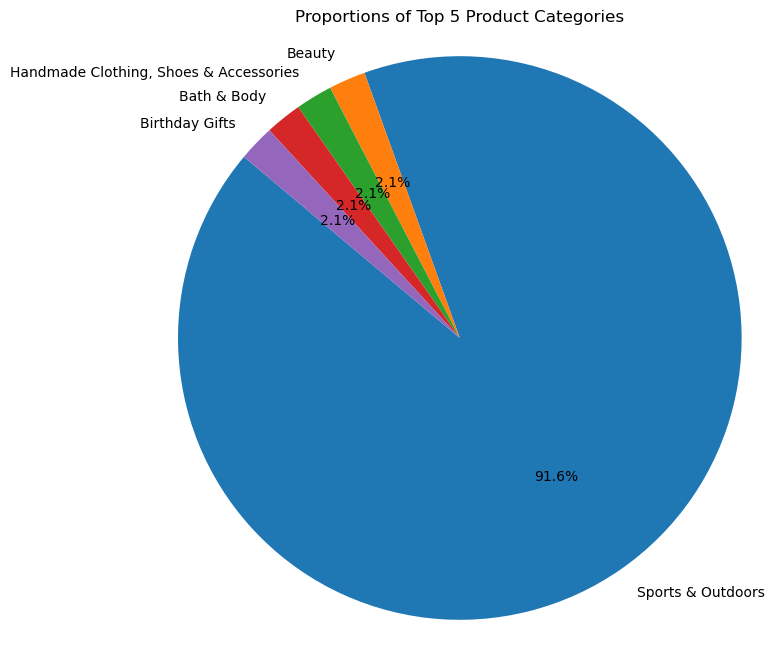

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(category_freq5, labels=category_freq5.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportions of Top 5 Product Categories')
plt.show()

In [19]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()

print("Mean price:", mean_price)
print("Median price:", median_price)
print("Mode price:", mode_price)

Mean price: 89.24380943923663
Median price: 19.09
Mode price: 0    9.99
Name: price, dtype: float64


In [21]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
price_range = df['price'].max() - df['price'].min()
interquartile_range = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print("Variance of price:", variance_price)
print("Standard deviation of price:", std_dev_price)
print("Range of price:", price_range)
print("Interquartile range of price:", interquartile_range)

Variance of price: 119445.48532256528
Standard deviation of price: 345.60886175352226
Range of price: 100000.0
Interquartile range of price: 36.0


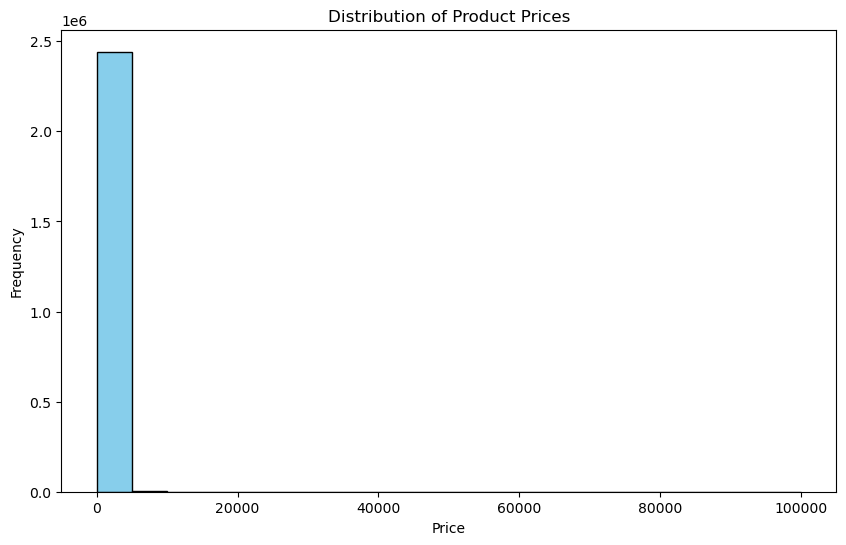

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

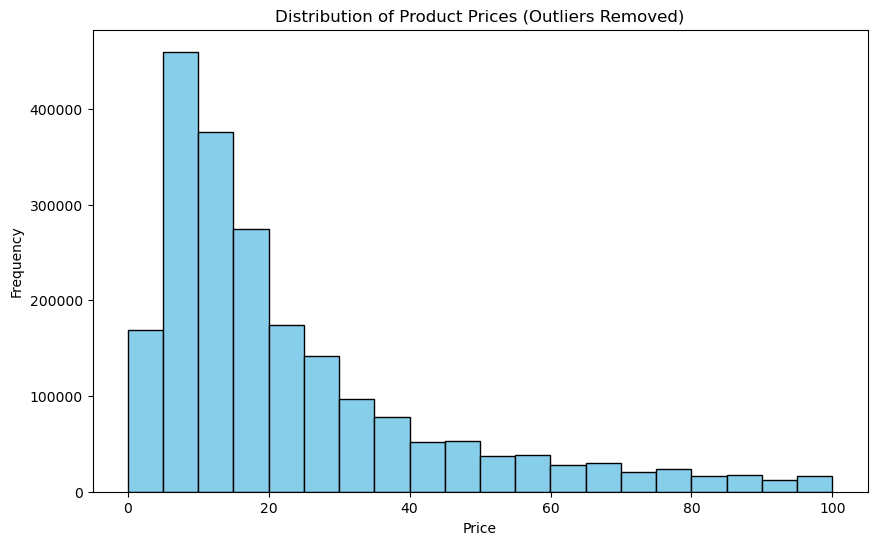

In [33]:
# Remove outliers using the interquartile range (IQR) method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

# Plot the histogram with the filtered data
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices (Outliers Removed)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

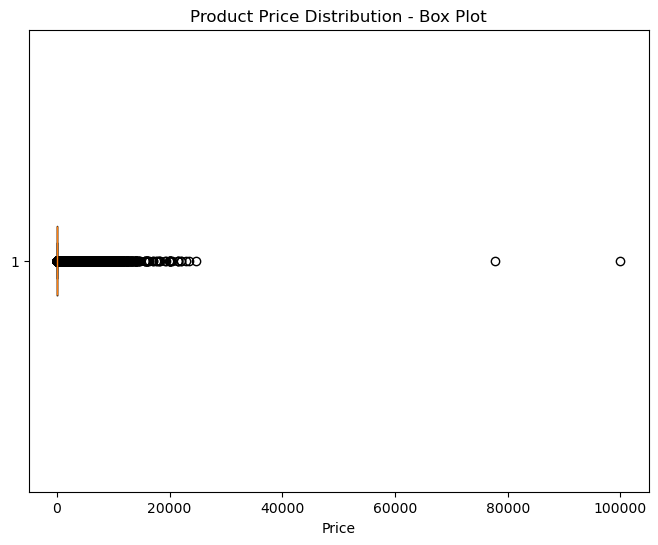

In [27]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Product Price Distribution - Box Plot')
plt.xlabel('Price')
plt.show()

In [63]:
df['stars'] = df['stars'].astype(str).str.rstrip('.')
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

df = df.dropna(subset=['stars'])

mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
interquartile_range_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print("Mean rating:", mean_rating)
print("Median rating:", median_rating)
print("Mode rating:", mode_rating)
print("Variance of rating:", variance_rating)
print("Standard deviation of rating:", std_dev_rating)
print("Interquartile range of rating:", interquartile_range_rating)

Mean rating: 2.152836472966065
Median rating: 0.0
Mode rating: 0    0.0
Name: stars, dtype: float64
Variance of rating: 4.81743402976196
Standard deviation of rating: 2.1948653785054697
Interquartile range of rating: 4.4


In [67]:
from scipy.stats import skew, kurtosis

skewness_rating = skew(df['stars'])
kurtosis_rating = kurtosis(df['stars'])

print("Skewness of rating:", skewness_rating)
print("Kurtosis of rating:", kurtosis_rating)

Skewness of rating: 0.08120730776283354
Kurtosis of rating: -1.926004642549839


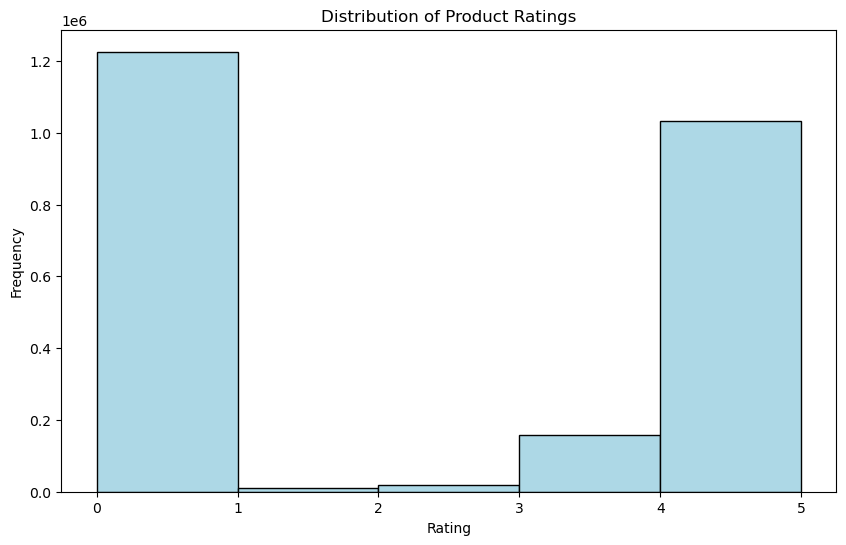

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['stars'], bins=5, color='lightblue', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()